<img src="http://hilpisch.com/tpq_logo.png" alt="The Python Quants" width="35%" align="right" border="0"><br>

# Python for Finance

**Analyze Big Financial Data**

O'Reilly (2014)

Yves Hilpisch

<img style="border:0px solid grey;" src="http://hilpisch.com/python_for_finance.png" alt="Python for Finance" width="30%" align="left" border="0">

**Buy the book ** |
<a href='http://shop.oreilly.com/product/0636920032441.do' target='_blank'>O'Reilly</a> |
<a href='http://www.amazon.com/Yves-Hilpisch/e/B00JCYHHJM' target='_blank'>Amazon</a>

**All book codes & IPYNBs** |
<a href="http://oreilly.quant-platform.com">http://oreilly.quant-platform.com</a>

**The Python Quants GmbH** | <a href='http://tpq.io' target='_blank'>http://tpq.io</a>

**Contact us** | <a href='mailto:pff@tpq.io'>pff@tpq.io</a>

# Financial Time Series

In [1]:
from pylab import plt
plt.style.use('seaborn')
import matplotlib as mpl
mpl.rcParams['font.family'] = 'serif'

## pandas Basics

In [2]:
import numpy as np
import pandas as pd

### First Steps with DataFrame Class

In [3]:
df = pd.DataFrame([10, 20, 30, 40], columns=['numbers'],
                  index=['a', 'b', 'c', 'd'])
df

,numbers
a,10
b,20
c,30
d,40


In [4]:
df.index  # the index values

Index(['a', 'b', 'c', 'd'], dtype='object')

In [5]:
df.columns  # the column names

Index(['numbers'], dtype='object')

In [6]:
df.loc['c']  # selection via index

numbers    30
Name: c, dtype: int64

In [7]:
df.loc[['a', 'd']]  # selection of multiple indices

,numbers
a,10
d,40


In [8]:
df.loc[df.index[1:3]]  # selection via Index object

,numbers
b,20
c,30


In [9]:
df.sum()  # sum per column

numbers    100
dtype: int64

In [10]:
df.apply(lambda x: x ** 2)  # square of every element

,numbers
a,100
b,400
c,900
d,1600


In [11]:
df ** 2  # again square, this time NumPy-like

,numbers
a,100
b,400
c,900
d,1600


In [12]:
df['floats'] = (1.5, 2.5, 3.5, 4.5)
  # new column is generated
df

,numbers,floats
a,10,1.5
b,20,2.5
c,30,3.5
d,40,4.5


In [13]:
df['floats']  # selection of column

a    1.5
b    2.5
c    3.5
d    4.5
Name: floats, dtype: float64

In [14]:
df['names'] = pd.DataFrame(['Yves', 'Guido', 'Felix', 'Francesc'],
                           index=['d', 'a', 'b', 'c'])
df

,numbers,floats,names
a,10,1.5,Guido
b,20,2.5,Felix
c,30,3.5,Francesc
d,40,4.5,Yves


In [15]:
df.append({'numbers': 100, 'floats': 5.75, 'names': 'Henry'},
               ignore_index=True)
  # temporary object; df not changed

,numbers,floats,names
0,10,1.50,Guido
1,20,2.50,Felix
2,30,3.50,Francesc
3,40,4.50,Yves
4,100,5.75,Henry


In [16]:
df = df.append(pd.DataFrame({'numbers': 100, 'floats': 5.75,
                             'names': 'Henry'}, index=['z',]))
df

,floats,names,numbers
a,1.50,Guido,10
b,2.50,Felix,20
c,3.50,Francesc,30
d,4.50,Yves,40
z,5.75,Henry,100


In [17]:
df.join(pd.DataFrame([1, 4, 9, 16, 25],
            index=['a', 'b', 'c', 'd', 'y'],
            columns=['squares',]))
  # temporary object

,floats,names,numbers,squares
a,1.50,Guido,10,1.0
b,2.50,Felix,20,4.0
c,3.50,Francesc,30,9.0
d,4.50,Yves,40,16.0
z,5.75,Henry,100,NaN


In [18]:
df = df.join(pd.DataFrame([1, 4, 9, 16, 25],
                    index=['a', 'b', 'c', 'd', 'y'],
                    columns=['squares',]),
                    how='outer')
df

,floats,names,numbers,squares
a,1.50,Guido,10.0,1.0
b,2.50,Felix,20.0,4.0
c,3.50,Francesc,30.0,9.0
d,4.50,Yves,40.0,16.0
y,NaN,NaN,NaN,25.0
z,5.75,Henry,100.0,NaN


In [19]:
df[['numbers', 'squares']].mean()
  # column-wise mean

numbers    40.0
squares    11.0
dtype: float64

In [20]:
df[['numbers', 'squares']].std()
  # column-wise standard deviation

numbers    35.355339
squares     9.669540
dtype: float64

### Second Steps with DataFrame Class

In [21]:
a = np.random.standard_normal((9, 4))
a.round(6)

array([[ 1.321677, -0.223755,  0.845289,  1.312106],
       [-0.958205,  0.763066, -0.188933, -0.863822],
       [ 0.224055, -0.62577 , -1.975839,  0.250876],
       [ 0.574035, -0.182031,  0.312119,  0.597762],
       [ 0.172791,  1.04793 , -0.687687,  0.4307  ],
       [ 0.546069,  1.035873, -0.371233,  1.692606],
       [-1.600886, -0.179964,  0.376877,  0.27294 ],
       [ 1.265513,  1.319254,  1.26514 ,  1.596943],
       [-1.668441,  0.36277 ,  0.710947,  2.149087]])

In [22]:
df = pd.DataFrame(a)
df

,0,1,2,3
0,1.321677,-0.223755,0.845289,1.312106
1,-0.958205,0.763066,-0.188933,-0.863822
2,0.224055,-0.625770,-1.975839,0.250876
3,0.574035,-0.182031,0.312119,0.597762
4,0.172791,1.047930,-0.687687,0.430700
5,0.546069,1.035873,-0.371233,1.692606
6,-1.600886,-0.179964,0.376877,0.272940
7,1.265513,1.319254,1.265140,1.596943
8,-1.668441,0.362770,0.710947,2.149087


In [23]:
df.columns = ['No1', 'No2', 'No3', 'No4']
df

,No1,No2,No3,No4
0,1.321677,-0.223755,0.845289,1.312106
1,-0.958205,0.763066,-0.188933,-0.863822
2,0.224055,-0.625770,-1.975839,0.250876
3,0.574035,-0.182031,0.312119,0.597762
4,0.172791,1.047930,-0.687687,0.430700
5,0.546069,1.035873,-0.371233,1.692606
6,-1.600886,-0.179964,0.376877,0.272940
7,1.265513,1.319254,1.265140,1.596943
8,-1.668441,0.362770,0.710947,2.149087


In [24]:
df['No2'].iloc[3]  # value in column No2 at index position 3

-0.18203051098590636

In [25]:
dates = pd.date_range('2015-1-1', periods=9, freq='M')
dates

DatetimeIndex(['2015-01-31', '2015-02-28', '2015-03-31', '2015-04-30',
               '2015-05-31', '2015-06-30', '2015-07-31', '2015-08-31',
               '2015-09-30'],
              dtype='datetime64[ns]', freq='M')

In [26]:
df.index = dates
df

,No1,No2,No3,No4
2015-01-31,1.321677,-0.223755,0.845289,1.312106
2015-02-28,-0.958205,0.763066,-0.188933,-0.863822
2015-03-31,0.224055,-0.625770,-1.975839,0.250876
2015-04-30,0.574035,-0.182031,0.312119,0.597762
2015-05-31,0.172791,1.047930,-0.687687,0.430700
2015-06-30,0.546069,1.035873,-0.371233,1.692606
2015-07-31,-1.600886,-0.179964,0.376877,0.272940
2015-08-31,1.265513,1.319254,1.265140,1.596943
2015-09-30,-1.668441,0.362770,0.710947,2.149087


In [27]:
np.array(df).round(6)

array([[ 1.321677, -0.223755,  0.845289,  1.312106],
       [-0.958205,  0.763066, -0.188933, -0.863822],
       [ 0.224055, -0.62577 , -1.975839,  0.250876],
       [ 0.574035, -0.182031,  0.312119,  0.597762],
       [ 0.172791,  1.04793 , -0.687687,  0.4307  ],
       [ 0.546069,  1.035873, -0.371233,  1.692606],
       [-1.600886, -0.179964,  0.376877,  0.27294 ],
       [ 1.265513,  1.319254,  1.26514 ,  1.596943],
       [-1.668441,  0.36277 ,  0.710947,  2.149087]])

### Basic Analytics

In [28]:
df.sum()

No1   -0.123391
No2    3.317374
No3    0.286681
No4    7.439198
dtype: float64

In [29]:
df.mean()

No1   -0.013710
No2    0.368597
No3    0.031853
No4    0.826578
dtype: float64

In [30]:
df.cumsum()

,No1,No2,No3,No4
2015-01-31,1.321677,-0.223755,0.845289,1.312106
2015-02-28,0.363472,0.539312,0.656356,0.448284
2015-03-31,0.587528,-0.086458,-1.319483,0.699160
2015-04-30,1.161563,-0.268489,-1.007364,1.296922
2015-05-31,1.334353,0.779441,-1.695050,1.727622
2015-06-30,1.880423,1.815314,-2.066284,3.420228
2015-07-31,0.279537,1.635350,-1.689407,3.693167
2015-08-31,1.545050,2.954604,-0.424267,5.290110
2015-09-30,-0.123391,3.317374,0.286681,7.439198


In [31]:
df.describe()

,No1,No2,No3,No4
count,9.000000,9.000000,9.000000,9.000000
mean,-0.013710,0.368597,0.031853,0.826578
std,1.135733,0.699097,0.974758,0.937597
min,-1.668441,-0.625770,-1.975839,-0.863822
25%,-0.958205,-0.182031,-0.371233,0.272940
50%,0.224055,0.362770,0.312119,0.597762
75%,0.574035,1.035873,0.710947,1.596943
max,1.321677,1.319254,1.265140,2.149087


In [32]:
np.sqrt(abs(df))

,No1,No2,No3,No4
2015-01-31,1.149642,0.473027,0.919396,1.145472
2015-02-28,0.978879,0.873537,0.434664,0.929420
2015-03-31,0.473345,0.791056,1.405645,0.500875
2015-04-30,0.757651,0.426650,0.558676,0.773150
2015-05-31,0.415681,1.023685,0.829269,0.656277
2015-06-30,0.738965,1.017778,0.609289,1.301002
2015-07-31,1.265261,0.424221,0.613903,0.522436
2015-08-31,1.124950,1.148588,1.124784,1.263702
2015-09-30,1.291681,0.602304,0.843177,1.465977


In [33]:
np.sqrt(abs(df)).sum()

No1    8.196056
No2    6.780846
No3    7.338804
No4    8.558312
dtype: float64

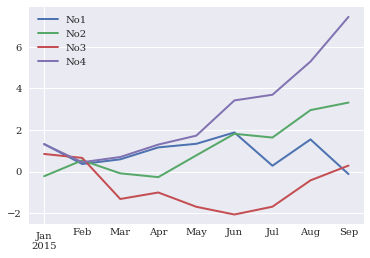

In [34]:
%matplotlib inline
df.cumsum().plot(lw=2.0, grid=True)
# tag: dataframe_plot
# title: Line plot of a DataFrame object

### Series Class

In [35]:
type(df)

pandas.core.frame.DataFrame

In [36]:
df['No1']

2015-01-31    1.321677
2015-02-28   -0.958205
2015-03-31    0.224055
2015-04-30    0.574035
2015-05-31    0.172791
2015-06-30    0.546069
2015-07-31   -1.600886
2015-08-31    1.265513
2015-09-30   -1.668441
Freq: M, Name: No1, dtype: float64

In [37]:
type(df['No1'])

pandas.core.series.Series

Text(0,0.5,'value')

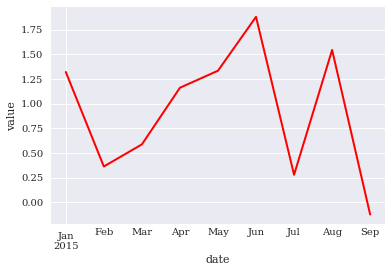

In [38]:
import matplotlib.pyplot as plt
df['No1'].cumsum().plot(style='r', lw=2., grid=True)
plt.xlabel('date')
plt.ylabel('value')
# tag: time_series
# title: Line plot of a Series object

### GroupBy Operations

In [39]:
df['Quarter'] = ['Q1', 'Q1', 'Q1', 'Q2', 'Q2', 'Q2', 'Q3', 'Q3', 'Q3']
df

,No1,No2,No3,No4,Quarter
2015-01-31,1.321677,-0.223755,0.845289,1.312106,Q1
2015-02-28,-0.958205,0.763066,-0.188933,-0.863822,Q1
2015-03-31,0.224055,-0.625770,-1.975839,0.250876,Q1
2015-04-30,0.574035,-0.182031,0.312119,0.597762,Q2
2015-05-31,0.172791,1.047930,-0.687687,0.430700,Q2
2015-06-30,0.546069,1.035873,-0.371233,1.692606,Q2
2015-07-31,-1.600886,-0.179964,0.376877,0.272940,Q3
2015-08-31,1.265513,1.319254,1.265140,1.596943,Q3
2015-09-30,-1.668441,0.362770,0.710947,2.149087,Q3


In [40]:
groups = df.groupby('Quarter')

In [41]:
groups.mean()

,No1,No2,No3,No4
Quarter,,,,
Q1,0.195843,-0.028819,-0.439828,0.233053
Q2,0.430965,0.633924,-0.248934,0.907023
Q3,-0.667938,0.500687,0.784321,1.339657


In [42]:
groups.max()

,No1,No2,No3,No4
Quarter,,,,
Q1,1.321677,0.763066,0.845289,1.312106
Q2,0.574035,1.047930,0.312119,1.692606
Q3,1.265513,1.319254,1.265140,2.149087


In [43]:
groups.size()

Quarter
Q1    3
Q2    3
Q3    3
dtype: int64

In [44]:
df['Odd_Even'] = ['Odd', 'Even', 'Odd', 'Even', 'Odd', 'Even',
                  'Odd', 'Even', 'Odd']

In [45]:
groups = df.groupby(['Quarter', 'Odd_Even'])

In [46]:
groups.size()

Quarter  Odd_Even
Q1       Even        1
         Odd         2
Q2       Even        2
         Odd         1
Q3       Even        1
         Odd         2
dtype: int64

In [47]:
groups.mean()

No1       No2       No3       No4
Quarter Odd_Even                                        
Q1      Even     -0.958205  0.763066 -0.188933 -0.863822
        Odd       0.772866 -0.424762 -0.565275  0.781491
Q2      Even      0.560052  0.426921 -0.029557  1.145184
        Odd       0.172791  1.047930 -0.687687  0.430700
Q3      Even      1.265513  1.319254  1.265140  1.596943
        Odd      -1.634663  0.091403  0.543912  1.211014

## Financial Data

In [48]:
# data from Thomson Reuters Eikon API
raw = pd.read_csv('source/tr_eikon_eod_data.csv',
                 index_col=0, parse_dates=True)
raw.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1972 entries, 2010-01-04 to 2017-10-31
Data columns (total 12 columns):
AAPL.O    1972 non-null float64
MSFT.O    1972 non-null float64
INTC.O    1972 non-null float64
AMZN.O    1972 non-null float64
GS.N      1972 non-null float64
SPY       1972 non-null float64
.SPX      1972 non-null float64
.VIX      1972 non-null float64
EUR=      1972 non-null float64
XAU=      1972 non-null float64
GDX       1972 non-null float64
GLD       1972 non-null float64
dtypes: float64(12)
memory usage: 200.3 KB


In [49]:
data = pd.DataFrame(raw['.SPX'])
data.columns = ['Close']

In [50]:
data.tail()

,Close
Date,
2017-10-25,2557.15
2017-10-26,2560.40
2017-10-27,2581.07
2017-10-30,2572.83
2017-10-31,2575.26


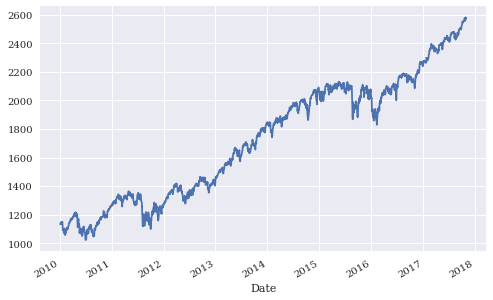

In [51]:
data['Close'].plot(figsize=(8, 5), grid=True);
# tag: dax
# title: Historical DAX index levels

In [52]:
%time data['Return'] = np.log(data['Close'] / data['Close'].shift(1))

CPU times: user 1.99 ms, sys: 857 µs, total: 2.84 ms
Wall time: 1.99 ms


In [53]:
data[['Close', 'Return', 'Return']].tail()

,Close,Return,Return
Date,,,
2017-10-25,2557.15,-0.004674,-0.004674
2017-10-26,2560.40,0.001270,0.001270
2017-10-27,2581.07,0.008041,0.008041
2017-10-30,2572.83,-0.003198,-0.003198
2017-10-31,2575.26,0.000944,0.000944


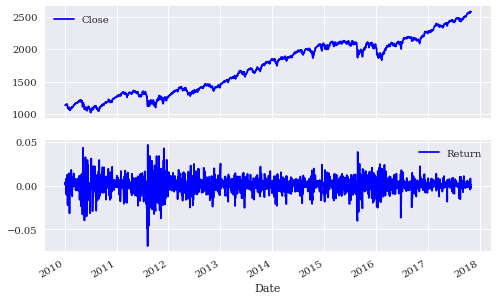

In [54]:
data[['Close', 'Return']].plot(subplots=True, style='b',
                              figsize=(8, 5), grid=True);
# tag: dax_returns
# title: The S&P 500 index and daily log returns

In [55]:
data['42d'] = data['Close'].rolling(window=42).mean()
data['252d'] = data['Close'].rolling(window=252).mean()

In [56]:
data[['Close', '42d', '252d']].tail()

,Close,42d,252d
Date,,,
2017-10-25,2557.15,2515.261429,2372.400873
2017-10-26,2560.40,2518.027143,2374.071389
2017-10-27,2581.07,2521.235952,2375.849286
2017-10-30,2572.83,2523.979762,2377.620794
2017-10-31,2575.26,2526.446667,2379.402976


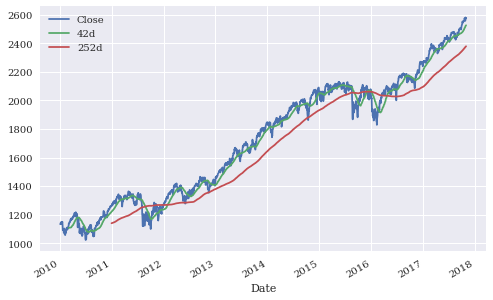

In [57]:
data[['Close', '42d', '252d']].plot(figsize=(8, 5), grid=True)
# tag: dax_trends
# title: The S&P index and moving averages

In [58]:
import math
data['Mov_Vol'] = data['Return'].rolling(window=252).std() * math.sqrt(252)
  # moving annual volatility

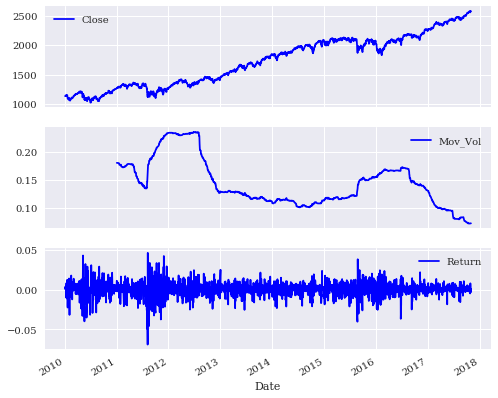

In [59]:
data[['Close', 'Mov_Vol', 'Return']].plot(subplots=True, style='b',
                                         figsize=(8, 7), grid=True);
# tag: dax_mov_std
# title: The S&P index and moving, annualized volatility

## Regression Analysis

In [60]:
import pandas as pd

In [61]:
# data from Thomson Reuters Eikon API
raw = pd.read_csv('source/tr_eikon_eod_data.csv',
                 index_col=0, parse_dates=True)
spx = pd.DataFrame(raw['.SPX'])

In [62]:
np.round(spx.tail())

,.SPX
Date,
2017-10-25,2557.0
2017-10-26,2560.0
2017-10-27,2581.0
2017-10-30,2573.0
2017-10-31,2575.0


In [63]:
vix = pd.DataFrame(raw['.VIX'])
vix.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1972 entries, 2010-01-04 to 2017-10-31
Data columns (total 1 columns):
.VIX    1972 non-null float64
dtypes: float64(1)
memory usage: 30.8 KB


In [64]:
data = spx.join(vix)

In [65]:
data.tail()

,.SPX,.VIX
Date,,
2017-10-25,2557.15,11.23
2017-10-26,2560.40,11.30
2017-10-27,2581.07,9.80
2017-10-30,2572.83,10.50
2017-10-31,2575.26,10.18


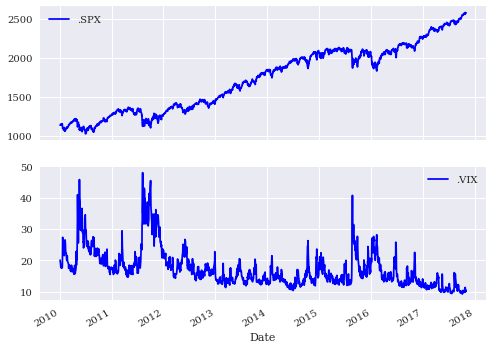

In [66]:
data.plot(subplots=True, grid=True, style='b', figsize=(8, 6));
# tag: spx_vix
# title: The S&P 500 Index and the VIX volatility index

In [67]:
rets = np.log(data / data.shift(1)) 
rets.head()

,.SPX,.VIX
Date,,
2010-01-04,NaN,NaN
2010-01-05,0.003111,-0.035038
2010-01-06,0.000545,-0.009868
2010-01-07,0.003993,-0.005233
2010-01-08,0.002878,-0.050024


In [68]:
rets.dropna(inplace=True)

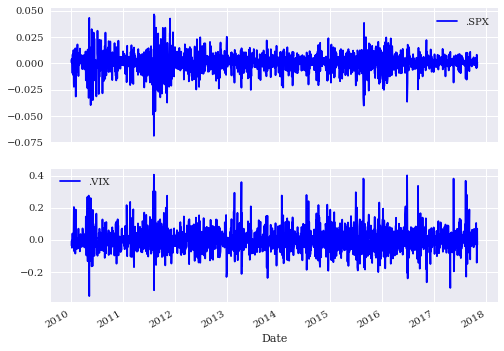

In [69]:
rets.plot(subplots=True, grid=True, style='b', figsize=(8, 6));
# tag: es50_vs_rets
# title: Log returns of S&P500 and VIX

In [70]:
import numpy as np

In [71]:
xdat = rets['.SPX'].values
ydat = rets['.VIX'].values
reg = np.polyfit(x=xdat, y=ydat, deg=1)
reg

array([ -6.45336250e+00,   2.34474296e-03])

Text(0,0.5,'VIX returns')

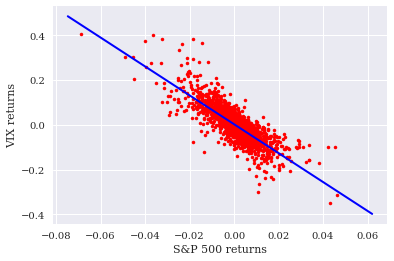

In [72]:
plt.plot(xdat, ydat, 'r.')
ax = plt.axis()  # grab axis values
x = np.linspace(ax[0], ax[1] + 0.01)
plt.plot(x, np.polyval(reg, x), 'b', lw=2)
plt.grid(True)
plt.axis('tight')
plt.xlabel('S&P 500 returns')
plt.ylabel('VIX returns')
# tag: scatter_rets
# title: Scatter plot of log returns and regression line

In [73]:
rets.corr()

,.SPX,.VIX
.SPX,1.000000,-0.808372
.VIX,-0.808372,1.000000


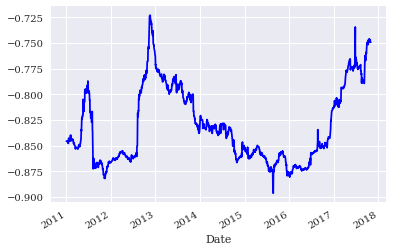

In [74]:
rets['.SPX'].rolling(window=252).corr(rets['.VIX']).plot(grid=True, style='b')
# tag: roll_corr
# title: Rolling correlation between S&P 500 and VIX

## High Frequency Data

In [75]:
import numpy as np
import pandas as pd
import datetime as dt
%matplotlib inline

In [76]:
# data from FXCM Forex Capital Markets Ltd.
eur_usd = pd.read_csv('source/fxcm_eur_usd_tick_data.csv',
                     index_col=0, parse_dates=True)

In [77]:
eur_usd.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 17352 entries, 2017-11-10 12:00:00.007000 to 2017-11-10 14:00:00.131000
Data columns (total 2 columns):
Bid    17352 non-null float64
Ask    17352 non-null float64
dtypes: float64(2)
memory usage: 406.7 KB


In [78]:
eur_usd['Mid'] = eur_usd.mean(axis=1)

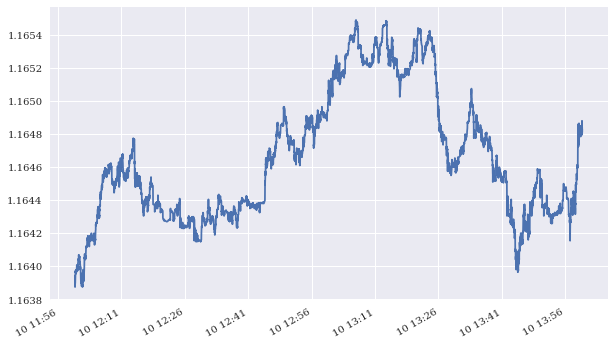

In [79]:
eur_usd['Mid'].plot(figsize=(10, 6));
# tag: eur_uusd
# title: EUR/USD tick data for two hours

In [80]:
eur_usd_resam = eur_usd.resample(rule='1min', label='last').last()
eur_usd_resam.head()

,Bid,Ask,Mid
2017-11-10 12:00:00,1.16406,1.16407,1.164065
2017-11-10 12:01:00,1.16396,1.16397,1.163965
2017-11-10 12:02:00,1.16416,1.16418,1.164170
2017-11-10 12:03:00,1.16417,1.16417,1.164170
2017-11-10 12:04:00,1.16425,1.16427,1.164260


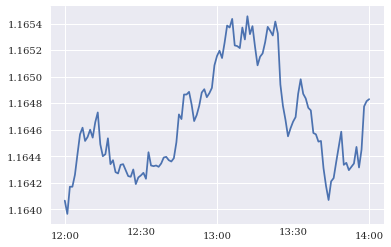

In [81]:
eur_usd_resam['Mid'].plot(grid=True)
# tag: eur_usd_resam
# title: Resampled EUR/USD exchange rate tick data

In [82]:
def reversal(x):
    return 2 * 1.16 - x

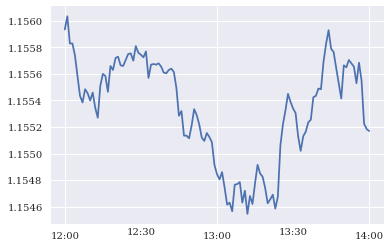

In [83]:
eur_usd_resam['Mid'].apply(reversal).plot()
# tag: aapl_resam_apply
# title: Resampled EUR/USD exchange rate tick data with function applied to it

## Conclusions

## Further Reading

<img src="http://hilpisch.com/tpq_logo.png" alt="The Python Quants" width="35%" align="right" border="0"><br>

<a href="http://tpq.io" target="_blank">http://tpq.io</a> | <a href="http://twitter.com/dyjh" target="_blank">@dyjh</a> | <a href="mailto:training@tpq.io">training@tpq.io</a>

**Quant Platform** |
<a href="http://quant-platform.com">http://quant-platform.com</a>

**Python for Finance** |
<a href="http://python-for-finance.com" target="_blank">Python for Finance @ O'Reilly</a>

**Derivatives Analytics with Python** |
<a href="http://derivatives-analytics-with-python.com" target="_blank">Derivatives Analytics @ Wiley Finance</a>

**Listed Volatility and Variance Derivatives** |
<a href="http://lvvd.tpq.io" target="_blank">Listed VV Derivatives @ Wiley Finance</a>

**Python Training** |
<a href="http://training.tpq.io" target="_blank">Python for Finance University Certificate</a>